# Influence of deforestation on microclimatological conditions

Two data frames **csv** and one netcdf **nc** data are read. Basic packages like **numpy, pandas** are used to read and playing around with data frames and **matplotlib** is used to visualize them properly. Netcdf is an array fromatted data, so xarray is used to deal with it. package like **catropy** and features like get_cmap gridspec from matplotlib are used to visualize gridded data properly. At the end, some basic correlation analysis are run to check the correlation between different parameters. 

## Loading Packages 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.gridspec as gridspec
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


## Loading Data

In [5]:
file = 'Forest_2018Nov29to2018Dec05.csv' 
forest = pd.read_csv(file, parse_dates=[0], index_col=0)


In [6]:
file2 = 'Pasture_2018Nov29to2018Dec05.csv'
pasture = pd.read_csv(file2, parse_dates=[0], index_col=0)

## Resampling data (Hourly)

In [7]:
forest_r = forest.resample('H').mean()
pasture_r = pasture.resample('H').mean()

Running random correlation to see how the data nimerically correalted with each other, just an idea just

## Resampling data day and night basis

In [9]:
forest_r['hour']= pd.DatetimeIndex(forest_r.index).hour
forest_day = forest_r.query('hour == 7 or hour==8 or hour==9 or hour==10 or hour==11 or hour==12 or hour==13 or hour==14 or hour==15 or hour==16 or hour==17')

pasture_r['hour']= pd.DatetimeIndex(pasture_r.index).hour
pasture_day = pasture_r.query('hour == 7 or hour==8 or hour==9 or hour==10 or hour==11 or hour==12 or hour==13 or hour==14 or hour==15 or hour==16 or hour==17')


forest_r['hour']= pd.DatetimeIndex(forest_r.index).hour
forest_night = forest_r.query('hour == 18 or hour==19 or hour==20 or hour==21 or hour==22 or hour==23 or hour==0 or hour==1 or hour==2 or hour==3 or hour==4 or hour==5 or hour==6')

pasture_r['hour']= pd.DatetimeIndex(pasture_r.index).hour
pasture_night = pasture_r.query('hour == 18 or hour==19 or hour==20 or hour==21 or hour==22 or hour==23 or hour==0 or hour==1 or hour==2 or hour==3 or hour==4 or hour==5 or hour==6')

average_f_day= forest_day.groupby(forest_day.iloc[:,17]).mean()
average_f_night= forest_night.groupby(forest_night.iloc[:,17]).mean()

average_p_day= pasture_day.groupby(forest_day.iloc[:,17]).mean()
average_p_night= pasture_night.groupby(forest_night.iloc[:,17]).mean()

forest_r.mean()
pasture_r.mean()

forest_day.mean()
pasture_day.mean()

TA (degC)          20.052597
RH (%)             54.763636
SWC (%)            12.281494
TS (degC)          17.826039
WS (m/s)            2.742727
WD (deg_north)    148.114351
TKE (m2/s2)         2.161987
SW_IN (W/m2)      672.887617
SW_OUT (W/m2)     139.364396
LW_IN (W/m2)      335.108331
LW_OUT (W/m2)     432.301390
LE (W/m2)         253.041955
H (W/m2)          105.954325
G (W/m2)            5.086247
ALB (%)            21.874026
U (m/s)            -0.822078
V (m/s)             0.599805
hour               12.000000
dtype: float64

## Reseting index of night values

The actudal csv file starts counting day from 00 hour. So during night hours (18h to 06h), after 23h the time gets 0 and this makes a plotting problem. So index is revised to make plots easier. New data index is 0 to 12. Its more like 0 is 18h, 1 is 19h ....... 5 is 23h ...... 7 is 01h and finally 12 is 06h. Shortly, the index shows 18h to 06h by an index of 0 to 12


In [10]:
fn1 = average_f_night.iloc[7:13,:]
fn1.reset_index(drop=True, inplace=True)
fn1
fn2 = average_f_night.iloc[0:7,:]
fn2.reset_index(drop=True, inplace=True)
fn2
fn3 = pd.concat([fn1, fn2])
fn3.reset_index(drop=True, inplace=True)

avg_f_night_newindex = fn3

fn5 = average_p_night.iloc[7:13,:]
fn5.reset_index(drop=True, inplace=True)
fn5
fn6 = average_p_night.iloc[0:7,:]
fn6.reset_index(drop=True, inplace=True)
fn6
fn7 = pd.concat([fn5, fn6])
fn7.reset_index(drop=True, inplace=True)

avg_p_night_newindex = fn7

avg_f_night_newindex.mean()
avg_p_night_newindex.mean()

TA (degC)          14.426703
RH (%)             73.108571
SWC (%)            12.389011
TS (degC)          17.817473
WS (m/s)            1.493736
WD (deg_north)    243.015989
TKE (m2/s2)         0.638022
SW_IN (W/m2)        2.915786
SW_OUT (W/m2)       1.580868
LW_IN (W/m2)      319.547440
LW_OUT (W/m2)     372.404220
LE (W/m2)          11.470115
H (W/m2)          -18.520412
G (W/m2)          -11.135148
ALB (%)             2.056593
U (m/s)             0.795110
V (m/s)            -0.504835
hour               11.076923
dtype: float64

## Plotting day night compsarisons

Plotting TKE 

Text(8, 1.5, '18h to 06h respectively')

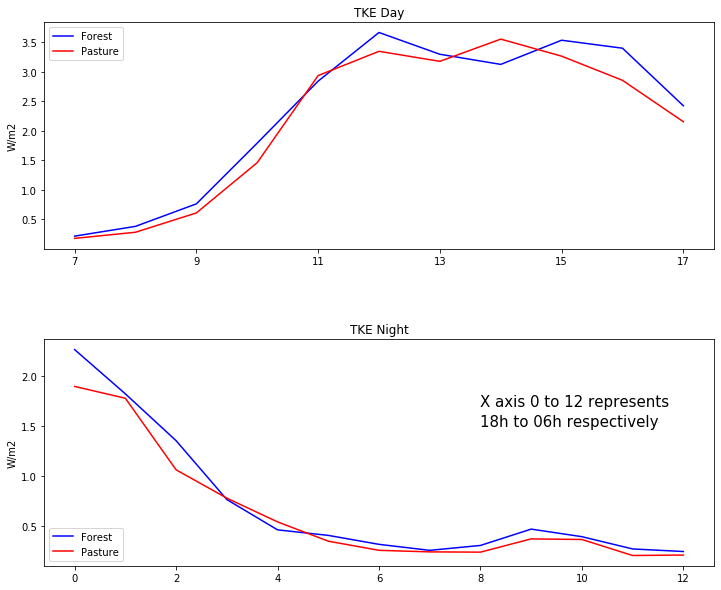

In [11]:
from matplotlib.legend_handler import HandlerLine2D

fig, (day, night)=plt.subplots(2,1,figsize=(12,10))
fig.subplots_adjust(hspace=0.4)

day.plot(average_f_day.index, average_f_day.iloc[:,6],color='blue', label="Forest")
day.plot(average_p_day.index, average_p_day.iloc[:,6],color='red', label="Pasture")
day.set_title('TKE Day')
day.legend(handler_map={day: HandlerLine2D(numpoints=3)},loc="upper left")
day.xaxis.set_ticks([7,9,11,13,15,17])
day.set_ylabel('W/m2')

night.plot(avg_f_night_newindex.index, avg_f_night_newindex.iloc[:,6], color='blue', label="Forest")
night.plot(avg_p_night_newindex.index, avg_p_night_newindex.iloc[:,6], color='red', label="Pasture")
night.set_title('TKE Night')
night.legend(handler_map={night: HandlerLine2D(numpoints=6)},loc="lower left")
night.xaxis.set_ticks([0,2,4,6,8,10,12])
night.set_ylabel('W/m2')
night.text(8,1.7, 'X axis 0 to 12 represents', fontsize=15)
night.text(8,1.5, '18h to 06h respectively',fontsize=15)

Plotting Surface energy component(LE)

Text(8, 20, '18h to 06h respectively')

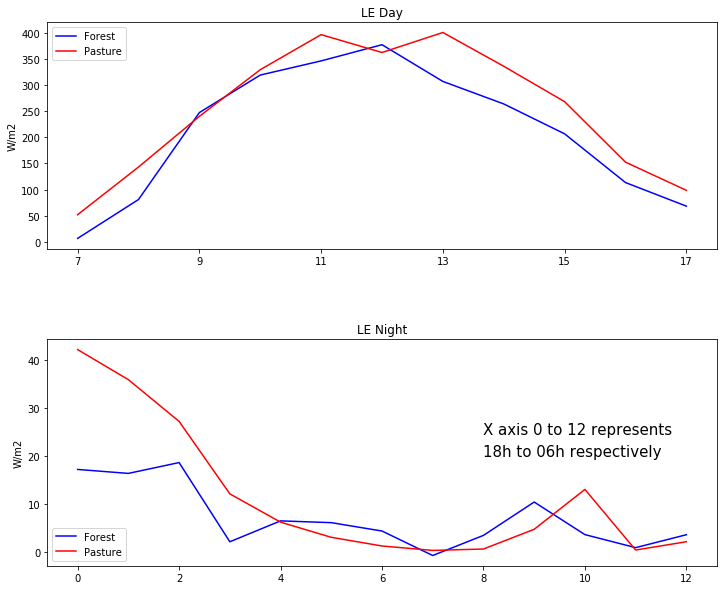

In [12]:
fig, (day, night)=plt.subplots(2,1,figsize=(12,10))
fig.subplots_adjust(hspace=0.4)

day.plot(average_f_day.index, average_f_day.iloc[:,11],color='blue', label="Forest")
day.plot(average_p_day.index, average_p_day.iloc[:,11],color='red', label="Pasture")
day.set_title('LE Day')
day.legend(handler_map={day: HandlerLine2D(numpoints=3)},loc="upper left")
day.xaxis.set_ticks([7,9,11,13,15,17])
day.set_ylabel('W/m2')

night.plot(avg_f_night_newindex.index, avg_f_night_newindex.iloc[:,11], color='blue', label="Forest")
night.plot(avg_p_night_newindex.index, avg_p_night_newindex.iloc[:,11], color='red', label="Pasture")
night.set_title('LE Night')
night.legend(handler_map={night: HandlerLine2D(numpoints=6)},loc="lower left")
night.xaxis.set_ticks([0,2,4,6,8,10,12])
night.set_ylabel('W/m2')
night.text(8,24.5, 'X axis 0 to 12 represents', fontsize=15)
night.text(8,20, '18h to 06h respectively',fontsize=15)


## Comparing Temperature and Humidity data

In [13]:

tem_rh_f = forest_r.iloc[:, 0:2] 
tem_rh_f.rename(columns={'TA (degC)':'TA','RH (%)':'RH' }, inplace=True)

tem_rh_p = pasture_r.iloc[:, 0:2]
tem_rh_p.rename(columns={'TA (degC)':'TA','RH (%)':'RH' }, inplace=True)


## Plotting data with normal default index

Plotting Temperature and Humidity data of both locations

Text(0, 0.5, '%')

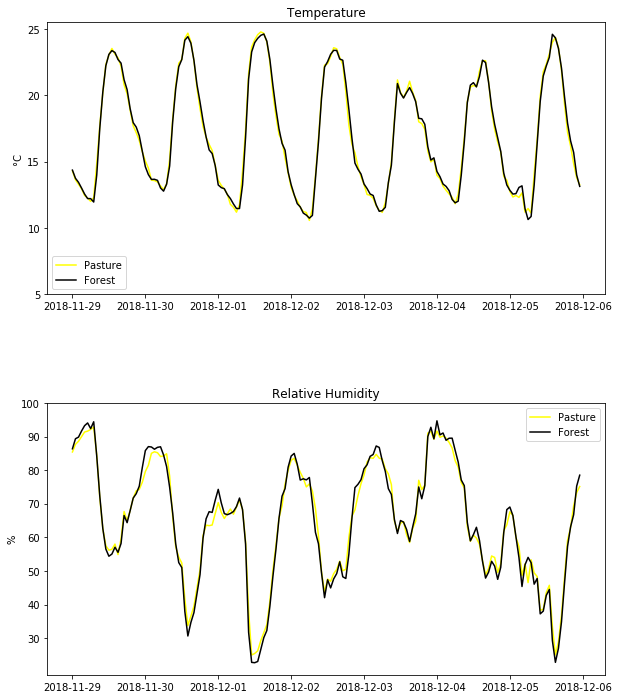

In [14]:
fig, (tmp, rh)=plt.subplots(2,1,figsize=(10,12))
fig.subplots_adjust(hspace=0.4)

tmp.plot(tem_rh_p.index, tem_rh_p.iloc[:,0], label= 'Pasture', color='yellow')
tmp.plot(tem_rh_f.index, tem_rh_f.iloc[:,0],label= 'Forest', color='black')
tmp.set_title('Temperature')
tmp.legend()
tmp.yaxis.set_ticks([5,10,15,20,25])
tmp.set_ylabel('°C')

rh.plot(tem_rh_p.index, tem_rh_p.RH, label= 'Pasture', color='yellow')
rh.plot(tem_rh_f.index, tem_rh_f.RH,label= 'Forest', color='black')
rh.set_title('Relative Humidity')
rh.legend()
rh.yaxis.set_ticks([30,40,50,60,70,80,90,100])
rh.set_ylabel('%')

Radiation and Surface energy budget

For doing this, first Radiation Budget and Surface Energy Budget are needed to be calculated 

1. ***Surface Energy Budget = LE + H + G***
2. **Radiation Budget = sw_in + sw_out + lw_in - lw_out**

In [18]:
rad_f = forest_r.iloc[:, 7:11]
rad_p = pasture_r.iloc[:, 7:11]

rad_f['Budget']= 0
rad_p['Budget']=0
for i in range(0,168):
    rad_f.iloc[i,4]=rad_f.iloc[i,0]+rad_f.iloc[i,1]+rad_f.iloc[i,2]-rad_f.iloc[i,3]
    
for i in range(0,168):
    rad_p.iloc[i,4]=rad_p.iloc[i,0]+rad_p.iloc[i,1]+rad_p.iloc[i,2]-rad_p.iloc[i,3]
      

surface_energy_f = forest_r.iloc[:, 11:14]
surface_energy_p = pasture_r.iloc[:, 11:14]    

surface_energy_f['Budget']=0
surface_energy_p['Budget']=0

for i in range(0,168):
    surface_energy_f.iloc[i,3]=surface_energy_f.iloc[i,0]+surface_energy_f.iloc[i,1]+surface_energy_f.iloc[i,2]

for i in range(0,168):
    surface_energy_p.iloc[i,3]=surface_energy_p.iloc[i,0]+surface_energy_p.iloc[i,1]+surface_energy_p.iloc[i,2]


## Plotting Radiation & Surface Energy Budget of both locations

Text(0, 0.5, 'W/m2')

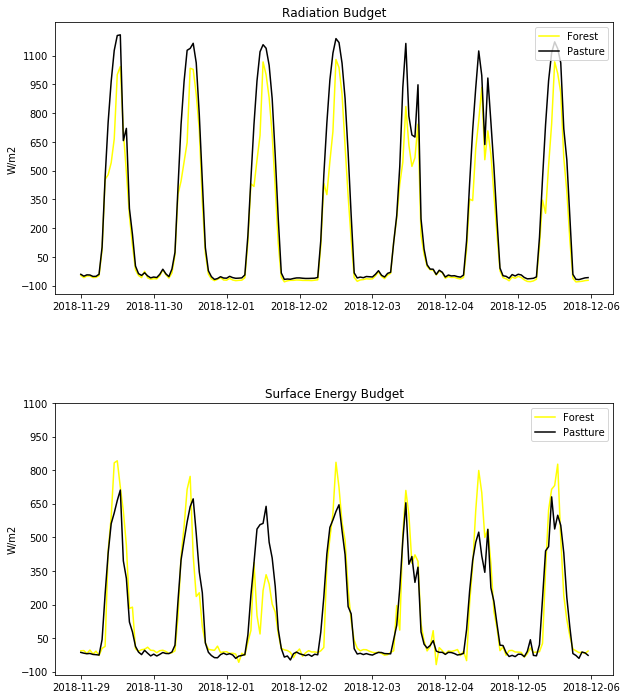

In [19]:
fig, (rad, sur)=plt.subplots(2,1,figsize=(10,12))
fig.subplots_adjust(hspace=0.4)

rad.plot(rad_f.index, rad_f.Budget, label= 'Forest', color='yellow')
rad.plot(rad_p.index, rad_p.Budget,label= 'Pasture', color='black')
rad.set_title('Radiation Budget')
rad.legend()
rad.yaxis.set_ticks(np.arange(-100, 1200, 150))
rad.set_ylabel('W/m2')

sur.plot(surface_energy_f.index, surface_energy_f.Budget, label= 'Forest', color='yellow')
sur.plot(surface_energy_p.index, surface_energy_p.Budget, label= 'Pastture', color='black')
sur.set_title('Surface Energy Budget')
sur.legend()
sur.yaxis.set_ticks(np.arange(-100, 1200, 150))
sur.set_ylabel('W/m2')

## Comparing wind dynamics and soil data of both ecosystems

In [22]:
forest_wind_dynamics = forest_r.iloc[:, 4:7]
pasture_wind_dynamics = pasture_r.iloc[:, 4:7]

forest_wind_dynamics.rename(columns={'WS (m/s)':'WS', 'WD (deg_north)': 'WD', 'TKE (m2/s2)':'TKE'}, inplace = True )
pasture_wind_dynamics.rename(columns={'WS (m/s)':'WS', 'WD (deg_north)': 'WD', 'TKE (m2/s2)':'TKE'}, inplace = True )

soil_f = forest_r.iloc[:, 2:4]
soil_p = pasture_r.iloc[:, 2:4]

soil_f.rename(columns={'SWC (%)':'swc', 'TS (degC)':'ts' }, inplace=True)
soil_p.rename(columns={'SWC (%)':'swc', 'TS (degC)':'ts' }, inplace=True)


## Plotting TKE & Wind Velocity of both ecosystems

Text(0, 0.5, 'm/s')

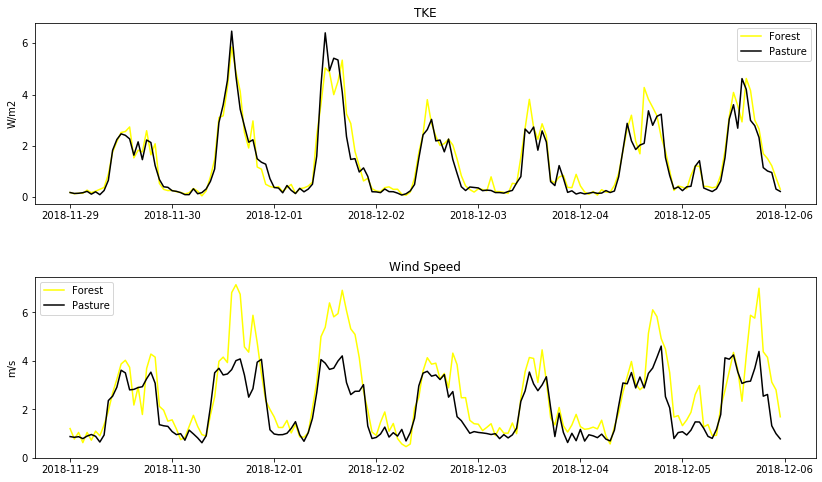

In [21]:
fig, (tke, speed)=plt.subplots(2,1,figsize=(14,8))
fig.subplots_adjust(hspace=0.4)

tke.plot(forest_wind_dynamics.index, forest_wind_dynamics.TKE, label= 'Forest', color='yellow')
tke.plot(pasture_wind_dynamics.index, pasture_wind_dynamics.TKE,label= 'Pasture', color='black')
tke.set_title('TKE')
tke.legend()
tke.yaxis.set_ticks([0,2,4,6])
tke.set_ylabel('W/m2')

speed.plot(forest_wind_dynamics.index, forest_wind_dynamics.WS, label= 'Forest', color='yellow')
speed.plot(pasture_wind_dynamics.index, pasture_wind_dynamics.WS, label= 'Pasture', color='black')
speed.set_title('Wind Speed')
speed.legend()
speed.yaxis.set_ticks([0,2,4,6])
speed.set_ylabel('m/s')


## Plottting SWC and TS of both ecosystems

Text(0, 0.5, '%')

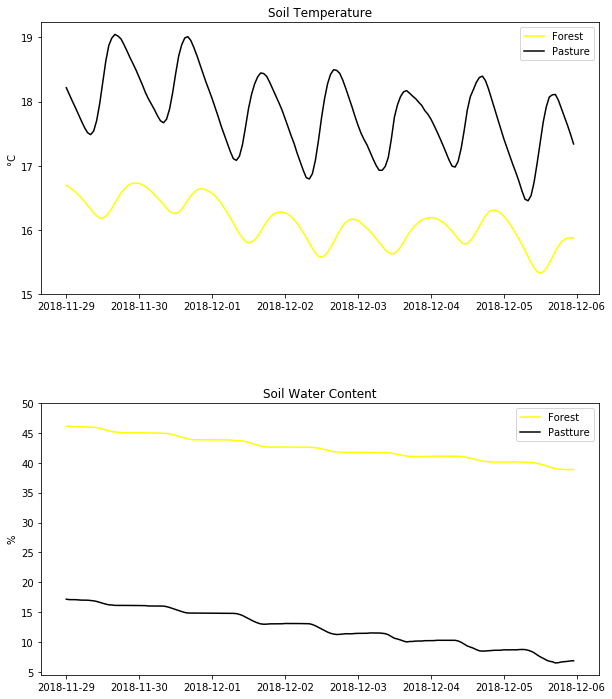

In [23]:
fig, (ts, swc)=plt.subplots(2,1,figsize=(10,12))
fig.subplots_adjust(hspace=0.4)

ts.plot(soil_f.index, soil_f.ts, label= 'Forest', color='yellow')
ts.plot(soil_p.index, soil_p.ts,label= 'Pasture', color='black')
ts.set_title('Soil Temperature')
ts.legend()
ts.yaxis.set_ticks(np.arange(15, 20, 1))
ts.set_ylabel('°C')

swc.plot(soil_f.index, soil_f.swc, label= 'Forest', color='yellow')
swc.plot(soil_p.index, soil_p.swc, label= 'Pastture', color='black')
swc.set_title('Soil Water Content')
swc.legend()
swc.yaxis.set_ticks(np.arange(5,55,5))
swc.set_ylabel('%')


## Plotting Windrose of both ecosystem

/home/shihsir/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/shihsir/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/shihsir/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/shihsir/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be 

Text(0.5, 1.05, 'Pasture WindRose')

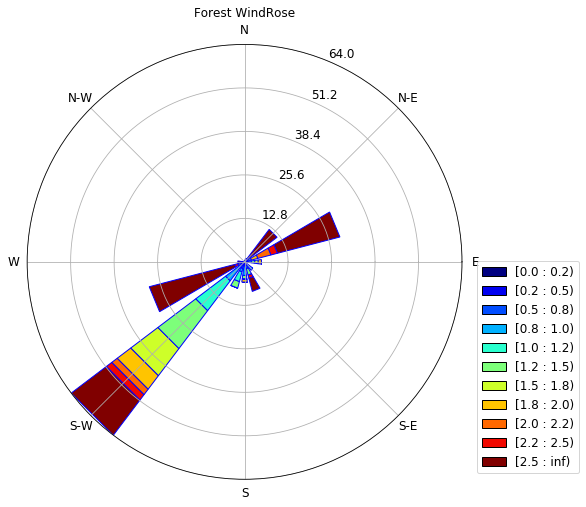

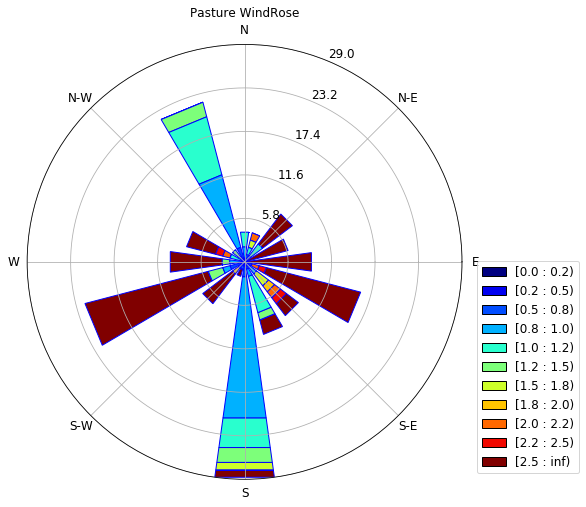

In [24]:
import windrose
import matplotlib.cm as cm

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection="windrose")
ax.bar(forest_wind_dynamics['WD'], forest_wind_dynamics['WS'],bins=np.arange(0,2.75, 0.25),
            cmap=cm.jet, edgecolor='blue', opening=0.7)
ax.legend(bbox_to_anchor=(1.02,0), fontsize=12)
ax.tick_params(labelsize=12)
ax.set_title("Forest WindRose")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection="windrose")
ax.bar(pasture_wind_dynamics['WD'], pasture_wind_dynamics['WS'],bins=np.arange(0,2.75, 0.25),
            cmap=cm.jet, edgecolor='blue', opening=0.7)
ax.legend(bbox_to_anchor=(1.02,0), fontsize=12)
ax.tick_params(labelsize=12)
ax.set_title('Pasture WindRose')

## Assigning local conditions to large scale conditions

In [25]:
path = '/home/shihsir/Desktop/Codes/Trachte/Final/'
file = 'ERA5_uv-rh500.nc' 
srcXR = xr.open_dataset(path+file)

srcXR.dims
srcXR.info()
srcXR.time.values

r_night = srcXR.sel(time='20181201.') 
r_day = srcXR.sel(time='20181201.5')
r_day.r

rh_range = np.arange(0., 101., 5.) 

xarray.Dataset {
dimensions:
	latitude = 81 ;
	longitude = 91 ;
	time = 2 ;

variables:
	float64 time(time) ;
		time:standard_name = time ;
		time:units = day as %Y%m%d.%f ;
		time:calendar = proleptic_gregorian ;
		time:axis = T ;
	float32 longitude(longitude) ;
	float32 latitude(latitude) ;
		latitude:standard_name = latitude ;
		latitude:long_name = latitude ;
		latitude:units = degrees_north ;
		latitude:axis = Y ;
	float32 u10(time, latitude, longitude) ;
	float32 v10(time, latitude, longitude) ;
	float32 r(time, latitude, longitude) ;

// global attributes:
	:CDI = Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/cdi) ;
	:Conventions = CF-1.6 ;
	:CDO = Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/cdo) ;
}

Text(-80.87515638888888, -5.973724722222222, 'Study area')

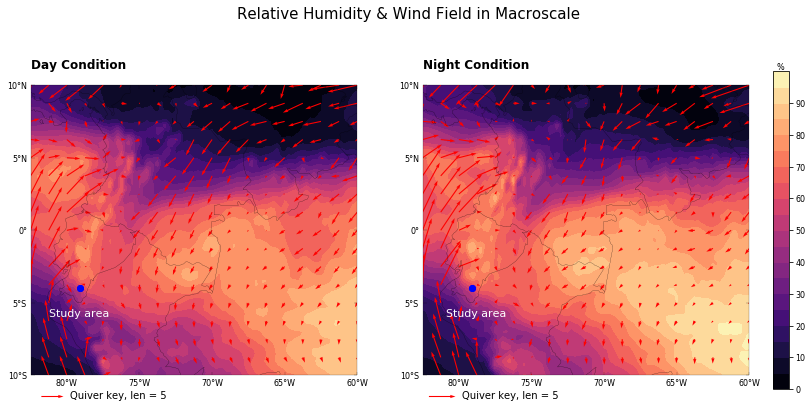

In [27]:
fig, (day,night) = plt.subplots(1,2,figsize=(14,6.5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Relative Humidity & Wind Field in Macroscale', fontsize=15)
fig.subplots_adjust(hspace=0.18)
#adding features and conturs

day.add_feature(cf.COASTLINE.with_scale('50m'),linewidth=0.2, zorder=4)
day.add_feature(cf.BORDERS.with_scale('50m'),  linewidth=0.2, zorder=4)
night.add_feature(cf.COASTLINE.with_scale('50m'),linewidth=0.2, zorder=4)
night.add_feature(cf.BORDERS.with_scale('50m'),  linewidth=0.2, zorder=4)

day_rh_contours = day.contourf(r_day.longitude,r_day.latitude,r_day.r,
                             levels=rh_range,cmap=get_cmap("magma"),
                             transform=ccrs.PlateCarree())
night_rh_contours = night.contourf(r_night.longitude,r_night.latitude,r_night.r,
                             levels=rh_range,cmap=get_cmap("magma"),
                             transform=ccrs.PlateCarree())

#common colorbar

cb_dn = plt.colorbar(day_rh_contours, ax=(day,night),
                      fraction=0.05,
                      pad=0.03,shrink=0.9,
                      ticks=np.arange(0,100,10))
cb_dn.ax.tick_params(labelsize=8)
cb_dn.ax.set_title('%',pad=2.0,ha='center',fontsize=8)
cb_dn.ax.set_anchor('W')

#day x & y ticks

day.set_xticks(np.arange(-80, -59, 5),crs=ccrs.PlateCarree())  
day.set_yticks(np.arange(-10, 12, 5),crs=ccrs.PlateCarree())
day.xaxis.set_major_formatter(LongitudeFormatter())
day.yaxis.set_major_formatter(LatitudeFormatter())
day.tick_params(reset=True,axis='both',which='major',
                labelsize=8,direction='in',
                bottom = True, top = True, 
                left = True, right = True, 
                width = 0.2, labelbottom=True, zorder=6) 
day.outline_patch.set_linewidth(0.2)
day.outline_patch.set_zorder(6)
day.set_xlim(r_day.longitude[0], r_day.longitude[-1])
day.set_ylim(r_day.latitude[-1],r_day.latitude[0])
day.text(0, 1.07, 'Day Condition', transform=day.transAxes, fontsize=12, 
            fontweight='bold',color='black', va='center', ha='left')    

#day quivers
   
q = day.quiver(r_day.longitude[::5], r_day.latitude[::5],
                          r_day.u10[::5, ::5],r_day.v10[::5, ::5],
                          color='red')
day.quiverkey(q, X=0.1, Y= -0.07, U=5,
             label='Quiver key, len = 5', labelpos='E',color='red')

#night x & y ticks
    
night.set_xticks(np.arange(-80, -59, 5),crs=ccrs.PlateCarree())  
night.set_yticks(np.arange(-10, 12, 5),crs=ccrs.PlateCarree())
night.xaxis.set_major_formatter(LongitudeFormatter())
night.yaxis.set_major_formatter(LatitudeFormatter())
night.tick_params(reset=True,axis='both',which='major',
                labelsize=8,direction='in',
                bottom = True, top = True, 
                left = True, right = True, 
                width = 0.2, labelbottom=True, zorder=6) 
night.outline_patch.set_linewidth(0.2)
night.outline_patch.set_zorder(6)
night.set_xlim(r_night.longitude[0], r_night.longitude[-1])
night.set_ylim(r_night.latitude[-1],r_night.latitude[0])
night.text(1.2, 1.07, 'Night Condition', transform=day.transAxes, fontsize=12, 
            fontweight='bold',color='black', va='center', ha='left')    

#night quivers
    
p = night.quiver(r_night.longitude[::5], r_night.latitude[::5],
                          r_night.u10[::5, ::5],r_night.v10[::5, ::5],
                          color='red')
night.quiverkey(p, X=0.1, Y= -0.07, U=5,
             label='Quiver key, len = 5', labelpos='E',color='red')

#assigning study area
f_lon, f_lat = -79.0755, -3.96670
p_lon, p_lat = -79.07515638888889, -3.9737247222222223

day.plot([f_lon, p_lon], [f_lat, p_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

night.plot([f_lon, p_lon], [f_lat, p_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

day.text(f_lon + 2, f_lat - 2, 'Study area', color='white', fontsize= 11,
         horizontalalignment='right',
         transform=ccrs.Geodetic())

night.text(p_lon - 1.8, p_lat - 2, 'Study area', color= 'white',fontsize= 11,
         horizontalalignment='left',
         transform=ccrs.Geodetic())

## Correlations

Between radiation Budget and TKE

Text(0.5, 1.0, 'Pasture')

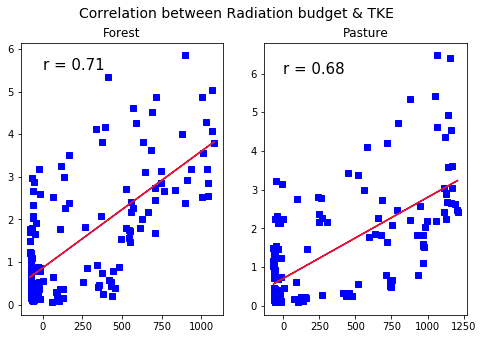

In [28]:
cor_1 = pd.concat([rad_f.Budget,forest_wind_dynamics.TKE], axis=1)
cor_2 = pd.concat([rad_p.Budget,pasture_wind_dynamics.TKE], axis=1)

r1 = cor_1.corr()
r1
r2 = cor_2.corr()
r2

a,b = np.polyfit(cor_1.Budget, cor_1.TKE, 1)
c,d = np.polyfit(cor_2.Budget, cor_2.TKE,1)

fig,(f, p) = plt.subplots(1,2, figsize=(8,5))
fig.suptitle('Correlation between Radiation budget & TKE', fontsize=14)
fig.subplots_adjust(hspace=0.25)

f.plot(cor_1.Budget, cor_1.TKE,'sb')
f.plot(cor_1.Budget, a*cor_1.Budget+b, color='crimson')
f.text(.1, 5.5, 'r = 0.71', fontsize=15)
f.set_title('Forest')

p.plot(cor_2.Budget, cor_2.TKE,'sb')
p.plot(cor_2.Budget, c*cor_2.Budget+d, color='crimson')
p.text(.1, 6, 'r = 0.68', fontsize=15)
p.set_title('Pasture')


Between LE and H

Text(0.5, 1.0, 'Forest')

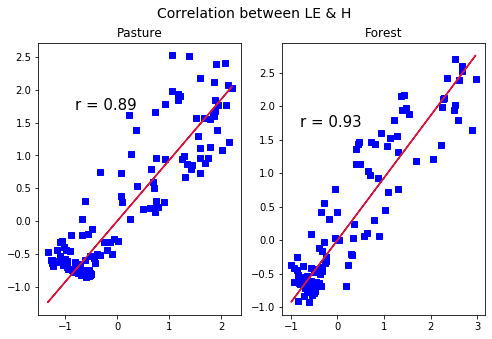

In [29]:
cor_5 = pd.concat([surface_energy_p.iloc[:,1],surface_energy_p.iloc[:,0]], axis=1)
cor_6 = pd.concat([surface_energy_f.iloc[:,1],surface_energy_f.iloc[:,0]], axis=1)

#Data is converted into standard distribution so that there is no weight bias.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cor_5)
cor_5 = scaler.transform(cor_5)

scaler.fit(cor_6)
cor_6 = scaler.transform(cor_6)

cor_5 = pd.DataFrame(cor_5) 
cor_6 = pd.DataFrame(cor_6)


r5 = cor_5.corr()
r5
r6 = cor_6.corr()
r6

i,j = np.polyfit(cor_5.iloc[:,0], cor_5.iloc[:,1], 1)
k,l = np.polyfit(cor_6.iloc[:,0], cor_6.iloc[:,1],1)

fig,(f, p) = plt.subplots(1,2, figsize=(8,5))
fig.suptitle('Correlation between LE & H', fontsize=14)
fig.subplots_adjust(hspace=0.25)

f.plot(cor_5.iloc[:,0], cor_5.iloc[:,1],'sb')
f.plot(cor_5.iloc[:,0], k*cor_5.iloc[:,0]+l, color='crimson')
f.text(-0.8,1.7, 'r = 0.89', fontsize=15)
f.set_title('Pasture')

p.plot(cor_6.iloc[:,0], cor_6.iloc[:,1],'sb')
p.plot(cor_6.iloc[:,0], k*cor_6.iloc[:,0]+l, color='crimson')
p.text(-.8,1.7, 'r = 0.93', fontsize=15)
p.set_title('Forest')

## Showing partition between LE and H for both sites

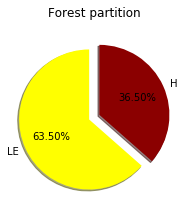

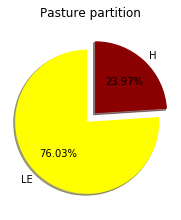

In [30]:
surface_energy_f.sum()
surface_energy_p.sum()

#Forest

labels= ['LE', 'H']
colors=['yellow', 'darkred']
sizes= [17025.3015, 9784.1055]
plt.figure(figsize=(3,3.5))
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.08, 0.08), autopct='%1.2f%%')
plt.title('Forest partition')
plt.axis('equal')
plt.show()

#Pasture

labels= ['LE', 'H']
colors=['yellow', 'darkred']
sizes= [20528.0110, 6473.1255]
plt.figure(figsize=(3,3.5))
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True,explode=(0.08, 0.08), autopct='%1.2f%%')
plt.title('Pasture partition')
plt.axis('equal')
plt.show()